In [1]:
import numpy as np
import osmnx as ox
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [114]:
routes = np.load('data/OA5LP1RP1OW1HS0.1TA5.npy', allow_pickle=True)

In [115]:
nodes_in_routes = []
edges_in_routes = []

for route in routes:
    for i in range(0, len(route) - 2):
        nodes_in_routes.append(route[i])
        edges_in_routes.append((route[i], route[i + 1]))
    nodes_in_routes.append(route[-1])

(<Figure size 800x800 with 1 Axes>, <Axes: >)

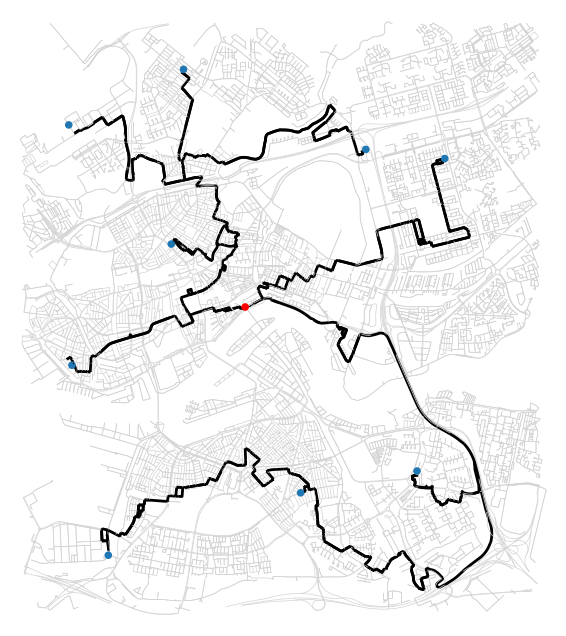

In [116]:

source = 670854737
sink = [44254038, 44341323, 670854737, 44448306, 3161262011, 44232104, 44176183, 44532514, 1680069937, 44613980]



default_graph_file_path = "../../graph/graph_base_case.graphml"
graph_OW_False = ox.load_graphml(default_graph_file_path)

node_colors = []
node_size = []
edge_colors = []
edge_size = []
for index in graph_OW_False.nodes():
    if index in sink and index != source:
        node_colors.append('tab:blue')
        node_size.append(30)
    elif index == source:
        node_colors.append('red')
        node_size.append(30)
    elif index in nodes_in_routes:
        node_size.append(1)
        node_colors.append('black')
    else:
        node_colors.append("lightgray")
        node_size.append(0)

for (u, v) in graph_OW_False.edges():
    if (u, v) in edges_in_routes:
        edge_colors.append('black')
        edge_size.append(2)
    elif (v, u) in edges_in_routes:
        edge_colors.append('black')
        edge_size.append(2)
    else:
        edge_colors.append('lightgray')
        edge_size.append(0.5)

file_path = "OA5LP1RP1OW1HS0.1TA5.png"


ox.plot.plot_graph(
    graph_OW_False,
    bgcolor="white", 
    node_color=node_colors, 
    node_size=node_size, 
    edge_linewidth=edge_size,
    edge_color=edge_colors,
    show=False, save=True, filepath=file_path
)

In [3]:

source = 670854737
sink = [44254038, 44341323, 670854737, 44448306, 3161262011, 44232104, 44176183, 44532514, 1680069937, 44613980]



default_graph_file_path = "../../../graph/graph_base_case.graphml"
graph_OW_False = ox.load_graphml(default_graph_file_path)

In [4]:
os.listdir('data')

['OA1LP0.1RP0.1OW1HS0.1TA1.npy',
 'OA1LP0.1RP0.1OW1HS0.1TA5.npy',
 'OA1LP0.1RP0.1OW1HS1TA1.npy',
 'OA1LP0.1RP0.1OW1HS1TA5.npy',
 'OA1LP0.1RP0.1OW5HS0.1TA1.npy',
 'OA1LP0.1RP0.1OW5HS0.1TA5.npy',
 'OA1LP0.1RP0.1OW5HS1TA1.npy',
 'OA1LP0.1RP0.1OW5HS1TA5.npy',
 'OA1LP0.1RP1OW1HS0.1TA1.npy',
 'OA1LP0.1RP1OW1HS0.1TA5.npy',
 'OA1LP0.1RP1OW1HS1TA1.npy',
 'OA1LP0.1RP1OW1HS1TA5.npy',
 'OA1LP0.1RP1OW5HS0.1TA1.npy',
 'OA1LP0.1RP1OW5HS0.1TA5.npy',
 'OA1LP0.1RP1OW5HS1TA1.npy',
 'OA1LP0.1RP1OW5HS1TA5.npy',
 'OA1LP1RP0.1OW1HS0.1TA1.npy',
 'OA1LP1RP0.1OW1HS0.1TA5.npy',
 'OA1LP1RP0.1OW1HS1TA1.npy',
 'OA1LP1RP0.1OW1HS1TA5.npy',
 'OA1LP1RP0.1OW5HS0.1TA1.npy',
 'OA1LP1RP0.1OW5HS0.1TA5.npy',
 'OA1LP1RP0.1OW5HS1TA1.npy',
 'OA1LP1RP0.1OW5HS1TA5.npy',
 'OA1LP1RP1OW1HS0.1TA1.npy',
 'OA1LP1RP1OW1HS0.1TA5.npy',
 'OA1LP1RP1OW1HS1TA1.npy',
 'OA1LP1RP1OW1HS1TA5.npy',
 'OA1LP1RP1OW5HS0.1TA1.npy',
 'OA1LP1RP1OW5HS0.1TA5.npy',
 'OA1LP1RP1OW5HS1TA1.npy',
 'OA1LP1RP1OW5HS1TA5.npy',
 'OA5LP0.1RP0.1OW1HS0.1TA1.npy',
 'OA5LP

In [5]:
nodes_in_routes = []
# edges_in_routes = []

for filename in os.listdir('data'):
    routes = np.load('data/' + filename, allow_pickle=True)
    
    for route in routes:
        for i in range(0, len(route) - 2):
            nodes_in_routes.append(route[i])
#             edges_in_routes.append((route[i], route[i + 1]))            
            #check 
            if 'frequency' in graph_OW_False[route[i]][route[i+1]].get(0):
                frequency = graph_OW_False[route[i]][route[i+1]].get(0)['frequency']
                nx.set_edge_attributes(graph_OW_False, {(route[i], route[i+1], 0): {'frequency': frequency + 1}})
            else:
                nx.set_edge_attributes(graph_OW_False, {(route[i], route[i+1], 0): {'frequency': 1}})
                
            if graph_OW_False.has_edge(route[i+1], route[i]):
                if 'frequency' in graph_OW_False[route[i+1]][route[i]].get(0):
                    frequency = graph_OW_False[route[i+1]][route[i]].get(0)['frequency']
                    nx.set_edge_attributes(graph_OW_False, {(route[i+1], route[i], 0): {'frequency': frequency + 1}})
                else:
                    nx.set_edge_attributes(graph_OW_False, {(route[i+1], route[i], 0): {'frequency': 1}})
            
        nodes_in_routes.append(route[-1])

            
            

(<Figure size 800x800 with 1 Axes>, <Axes: >)

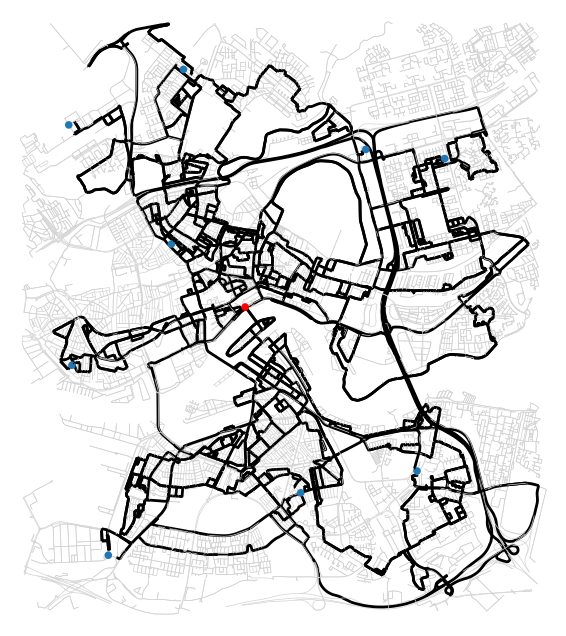

In [110]:

node_colors = []
node_size = []
edge_colors = []
edge_size = []
for index in graph_OW_False.nodes():
    if index in sink and index != source:
        node_colors.append('tab:blue')
        node_size.append(30)
    elif index == source:
        node_colors.append('red')
        node_size.append(30)
    elif index in nodes_in_routes:
        node_size.append(1)
        node_colors.append('black')
    else:
        node_colors.append("lightgray")
        node_size.append(0)

for (u, v, data) in graph_OW_False.edges(data=True):
    if 'frequency'in data:
        edge_colors.append('black')
        edge_size.append(2)
    else:
        edge_colors.append('lightgray')
        edge_size.append(0.5)

file_path = "all_paths.png"


ox.plot.plot_graph(
    graph_OW_False,
    bgcolor="white", 
    node_color=node_colors, 
    node_size=node_size, 
    edge_linewidth=edge_size,
    edge_color=edge_colors,
    show=False, save=True, filepath=file_path
)

In [6]:
data_set = []
for (u, v, data) in graph_OW_False.edges(data=True):
    if 'frequency'in data:
        data_set.append(data['frequency'])

In [7]:
df = pd.DataFrame(data_set)

In [8]:
df.describe()

,0
count,6863.000000
mean,181.648113
std,399.997652
min,1.000000
25%,16.000000
50%,66.000000
75%,216.000000
max,7700.000000


In [76]:
# sort valeus
df = df.sort_values(by = [0],  ascending=True)

# use your code but on a transposed dataframe
new = np.array_split(df.T, 5) # split columns into 5 bins

dfs = [new[i].T for i in range(len(new))]

Text(0, 0.5, 'Frequency')

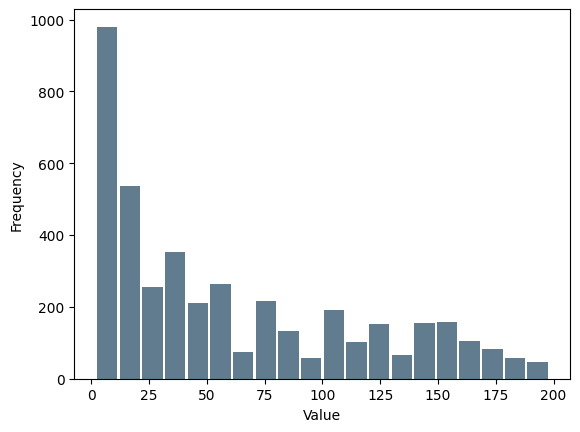

In [72]:
fig, ax = plt.subplots()
ax.hist(df[df[0] < 200], bins=20, rwidth=0.9,
                       color='#607c8e')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

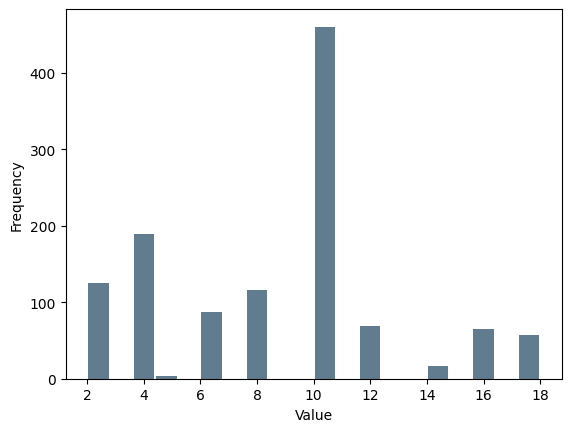

In [69]:
fig, ax = plt.subplots()
ax.hist(df[df[0] < 20], bins=20, rwidth=0.9,
                       color='#607c8e')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

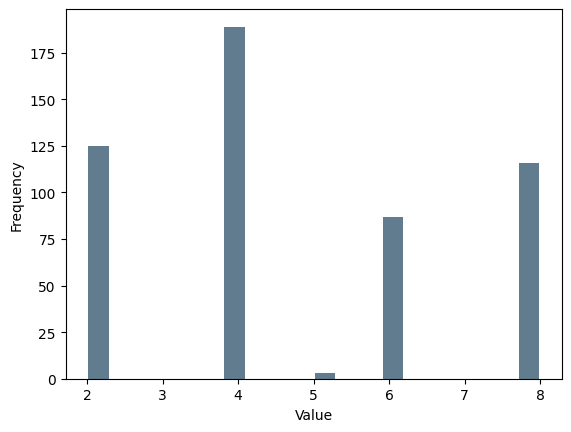

In [68]:

fig, ax = plt.subplots()
ax.hist(df[df[0] < 10], bins=20, rwidth=0.9,
                       color='#607c8e')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

In [10]:
lst = [50,100,200,300,400,500,600]
palette = sns.color_palette("inferno_r", 7)

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


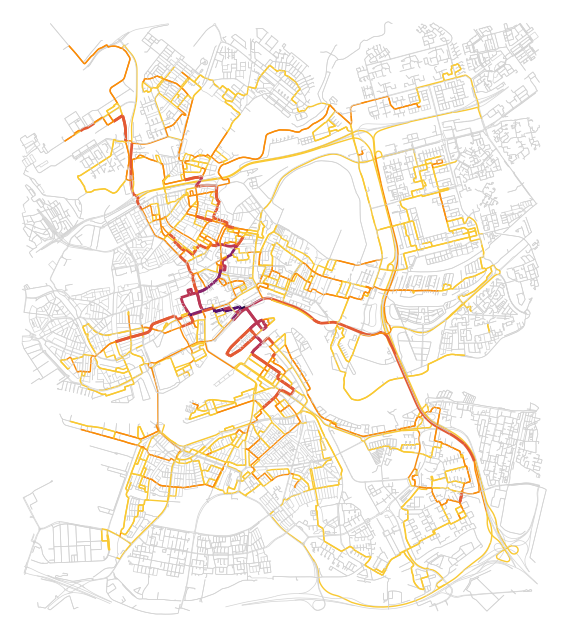

In [15]:
edge_colors = []
edge_size = []

for (u, v, data) in graph_OW_False.edges(data=True):
    if 'frequency'in data:
        if data['frequency'] < 20:
            edge_colors.append('lightgray')
            edge_size.append(0.5)
        elif data['frequency'] < 200:
            edge_colors.append(palette[0])
            edge_size.append(1)
        elif data['frequency'] < 500:
            edge_colors.append(palette[1])
            edge_size.append(1)
        elif data['frequency'] < 1000:
            edge_colors.append(palette[2])
            edge_size.append(2)
        elif data['frequency'] < 2000:
            edge_colors.append(palette[3])
            edge_size.append(2)
        elif data['frequency'] < 3000:
            edge_colors.append(palette[4])
            edge_size.append(2)
        elif data['frequency'] < 7000:
            edge_colors.append(palette[5])
            edge_size.append(2)
        else:
            edge_colors.append(palette[6])
            edge_size.append(2)
    else:
        edge_colors.append('lightgray')
        edge_size.append(0.5)
        
file_path = '30_points_heat_map.png'
fig, ax = ox.plot_graph(
            graph_OW_False, bgcolor="white", node_color="blue", node_size=0, edge_linewidth=edge_size, edge_color=edge_colors,
            save=True, filepath=file_path
            )